Quantum Circuit:


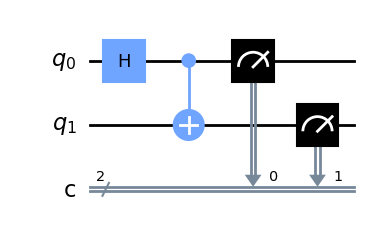


Measurement Results:
{'00': 504, '11': 520}


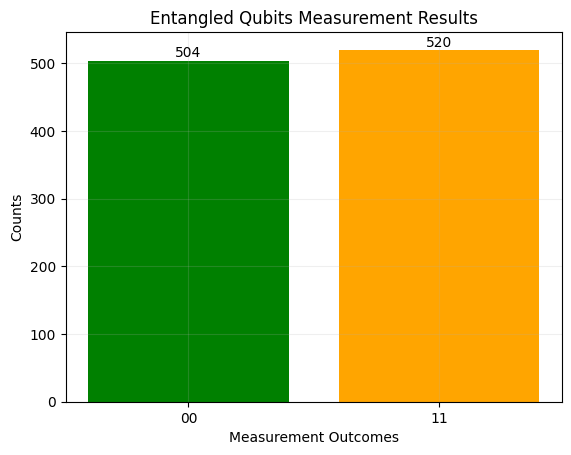

In [1]:
#-------------------------------------------------------------------------
# Quantum Entangled-Based Encoding
# Chapter 4 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt
#-------------------------------------------------------------------------

# Create a Quantum Circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Step 1: Create Entanglement
qc.h(0)        # Apply Hadamard gate to qubit 0 to create superposition
qc.cx(0, 1)    # Apply CNOT gate with qubit 0 as control and qubit 1 as target

# Step 2: Measure the qubits
qc.measure([0,1], [0,1])

# Visualize the circuit
print("Quantum Circuit:")
display(circuit_drawer(qc, output='mpl', style="iqp"))

# Execute the circuit on the qasm simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit with a specified number of shots (simulations)
shots = 1024
job   = execute(qc, simulator, shots=shots)

# Get the results
result = job.result()
counts = result.get_counts(qc)

# Print the results
print("\nMeasurement Results:")
print(counts)

# Extract keys and values
labels = list(counts.keys())
values = list(counts.values())

# Create the histogram 
# Note: using matplotlib directly - qiskit plot_histogram(counts) is buggy
plt.bar(labels, values, color=['green', 'orange'])
plt.title("Entangled Qubits Measurement Results")
plt.xlabel("Measurement Outcomes")
plt.grid(alpha=0.2)
plt.ylabel("Counts")

# Add counts above the bars
for i, value in enumerate(values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10, color='black')

plt.show()
